<a href="https://colab.research.google.com/github/crystalclcm/Forecasting_CA/blob/main/forecasting_seasonal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**forecasting a seasonal dataset using Russias temperature
Gavin Muldoon C21455374, crystal matticks C21352743**

**project brief**


when choosing a seasonal dataset,we chose Russias temperature as it is clear to see the drastic differences of the weather depending on certain times of the year. We also wanted to display any trends from the dataset for example the temperature fluctuates around the same time every year and that it reaches a similar temperature from year to year.

The source we used to get this data was:https://www.timeanddate.com/weather/russia/moscow/historic?month=1&year=2022

**Project details**

in this project we used many aspects in order to display,record and analyse the results of the dataset such as the Dickey-fuller Test,SARIMA and naive seasonal. Which was then compared on MAPE (mean absolute percentage error) in order to determine the overall best model to display the most accurate results of the dataset.

In [ ]:
#importing necessary tools
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.stattools import adfuller
from tqdm import tqdm_notebook
from itertools import product
from pandas import read_csv
from typing import Union


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

from statsmodels.tsa.seasonal import seasonal_decompose, STL

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [ ]:
df = pd.read_excel('scochastic russia excel(1).xlsx')

print(df)

        Month  Temperature
0  2018-01-01           -4
1  2018-02-01           -9
2  2018-03-01           -5
3  2018-04-01            7
4  2018-05-01           16
5  2018-06-01           17
6  2018-07-01           20
7  2018-08-01           20
8  2018-09-01           15
9  2018-10-01            7
10 2018-11-01           -1
11 2018-12-01           -6
12 2019-01-01           -7
13 2019-02-01           -1
14 2019-03-01            1
15 2019-04-01            8
16 2019-05-01           16
17 2019-06-01           20
18 2019-07-01           17
19 2019-08-01           16
20 2019-09-01           12
21 2019-10-01            9
22 2019-11-01            2
23 2019-12-01            1
24 2020-01-01            0
25 2020-02-01            0
26 2020-03-01            4
27 2020-04-01            5
28 2020-05-01           12
29 2020-06-01           19
30 2020-07-01           19
31 2020-08-01           18
32 2020-09-01           14
33 2020-10-01            9
34 2020-11-01            2
35 2020-12-01           -4
3

''Russias temperature is a good example of a seasonal forecast trend because it exhibits a clear and consistent pattern of seasonal variation over time. The temperature in Russia is strongly influenced by the changing seasons, with distinct periods of warm and cold weather throughout the year.''

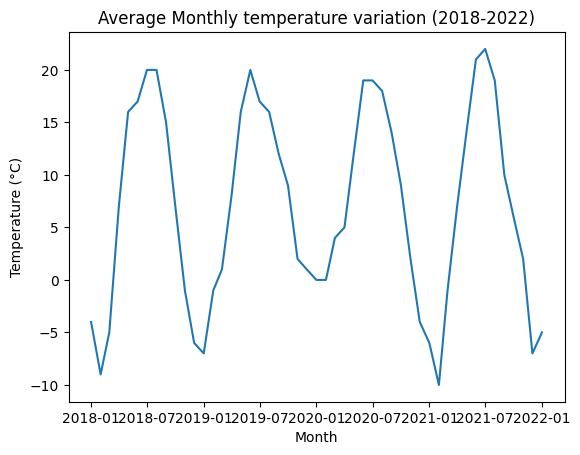

In [ ]:
plt.plot(df['Month'], df['Temperature'])
plt.xlabel('Month')
plt.ylabel('Temperature (°C)')
plt.title('Average Monthly temperature variation (2018-2022)')
plt.show()


this graph shows the variance from year to year with the coming trend coming from the fact it rises and falls around the same time for each year. This showcases the seasonality 


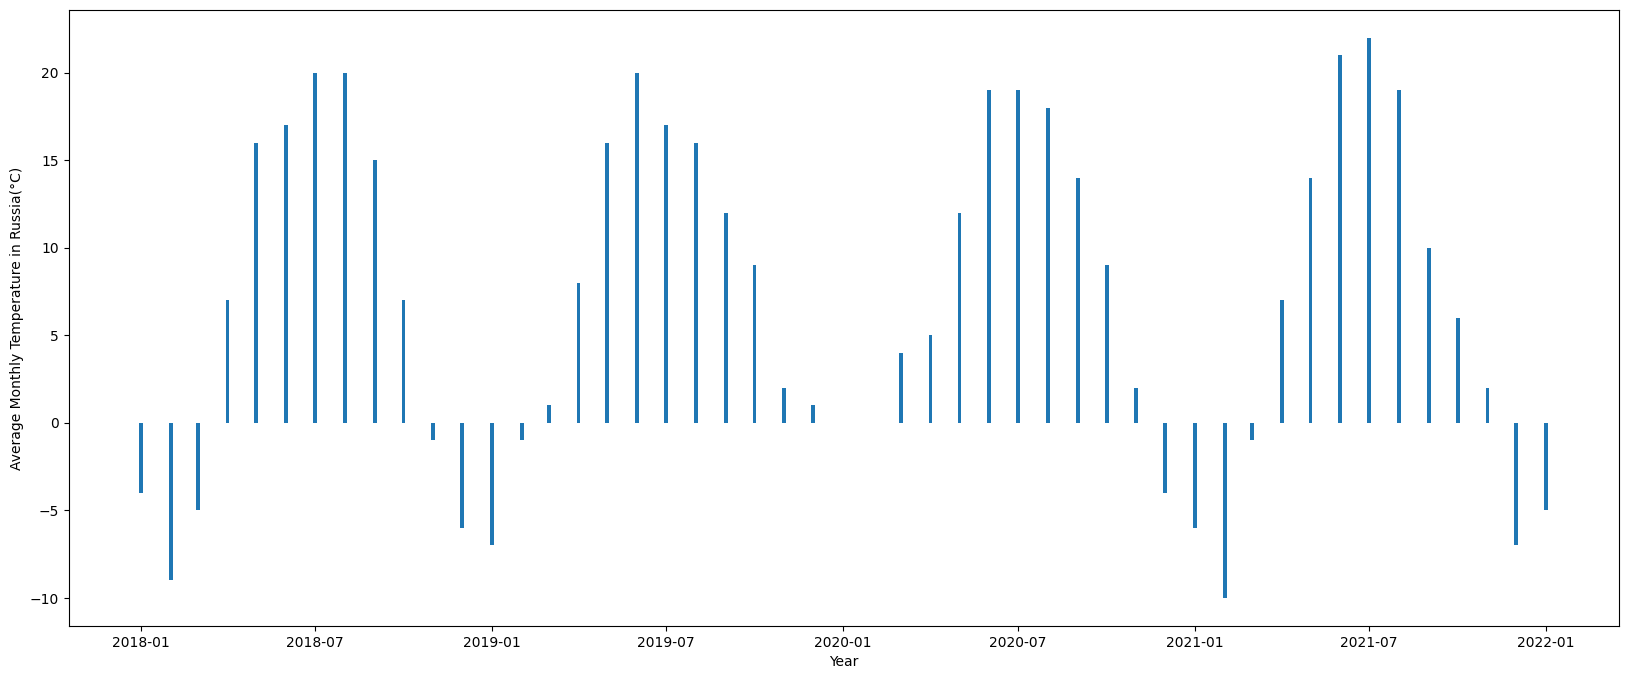

In [ ]:
fig, ax = plt.subplots(figsize=(20,8))
#setting Y and X axis along with labels for the graph
x_axis = df['Month']
y_axis = df['Temperature']
plt.bar(x_axis, y_axis, width=4)
plt.xlabel("Year")
plt.ylabel("Average Monthly Temperature in Russia(°C)")

plt.show()

The use of the different a graph allows the results of the overall seasonality to be displayed and compared more 


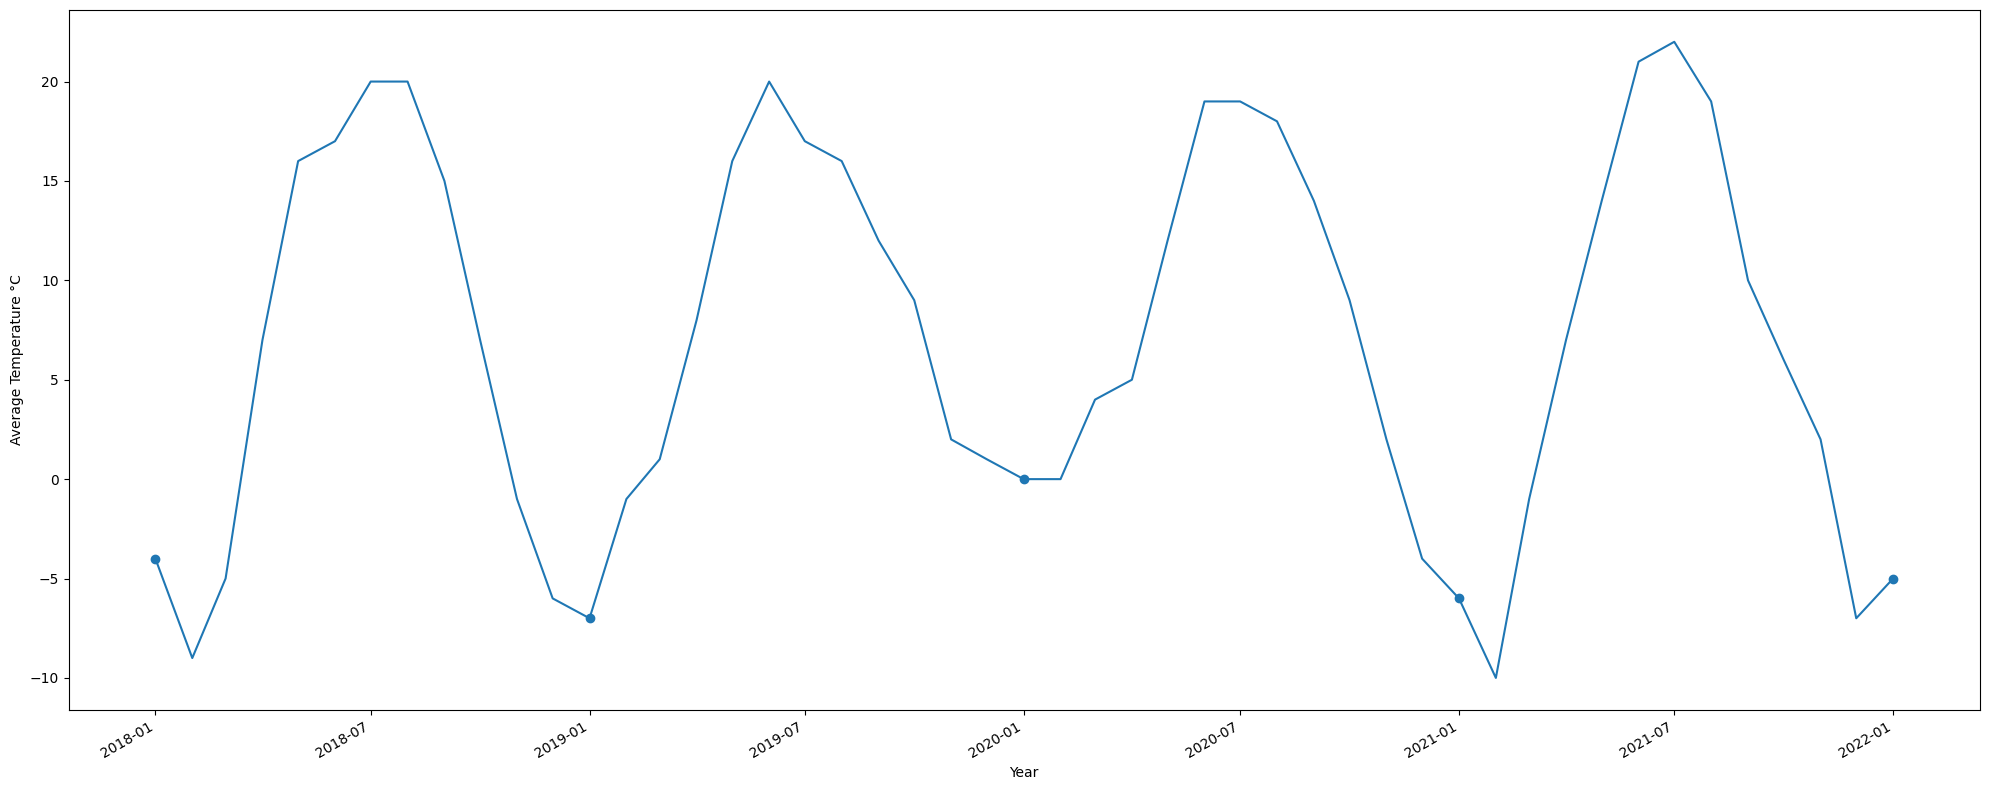

In [ ]:
fig, ax = plt.subplots(figsize=(20,8))
#adding markers
ax.plot(df['Month'],df['Temperature'], markevery=np.arange(0, 49, 12), marker='o') 
ax.set_xlabel('Year')
ax.set_ylabel('Average Temperature °C')



fig.autofmt_xdate()
plt.tight_layout()

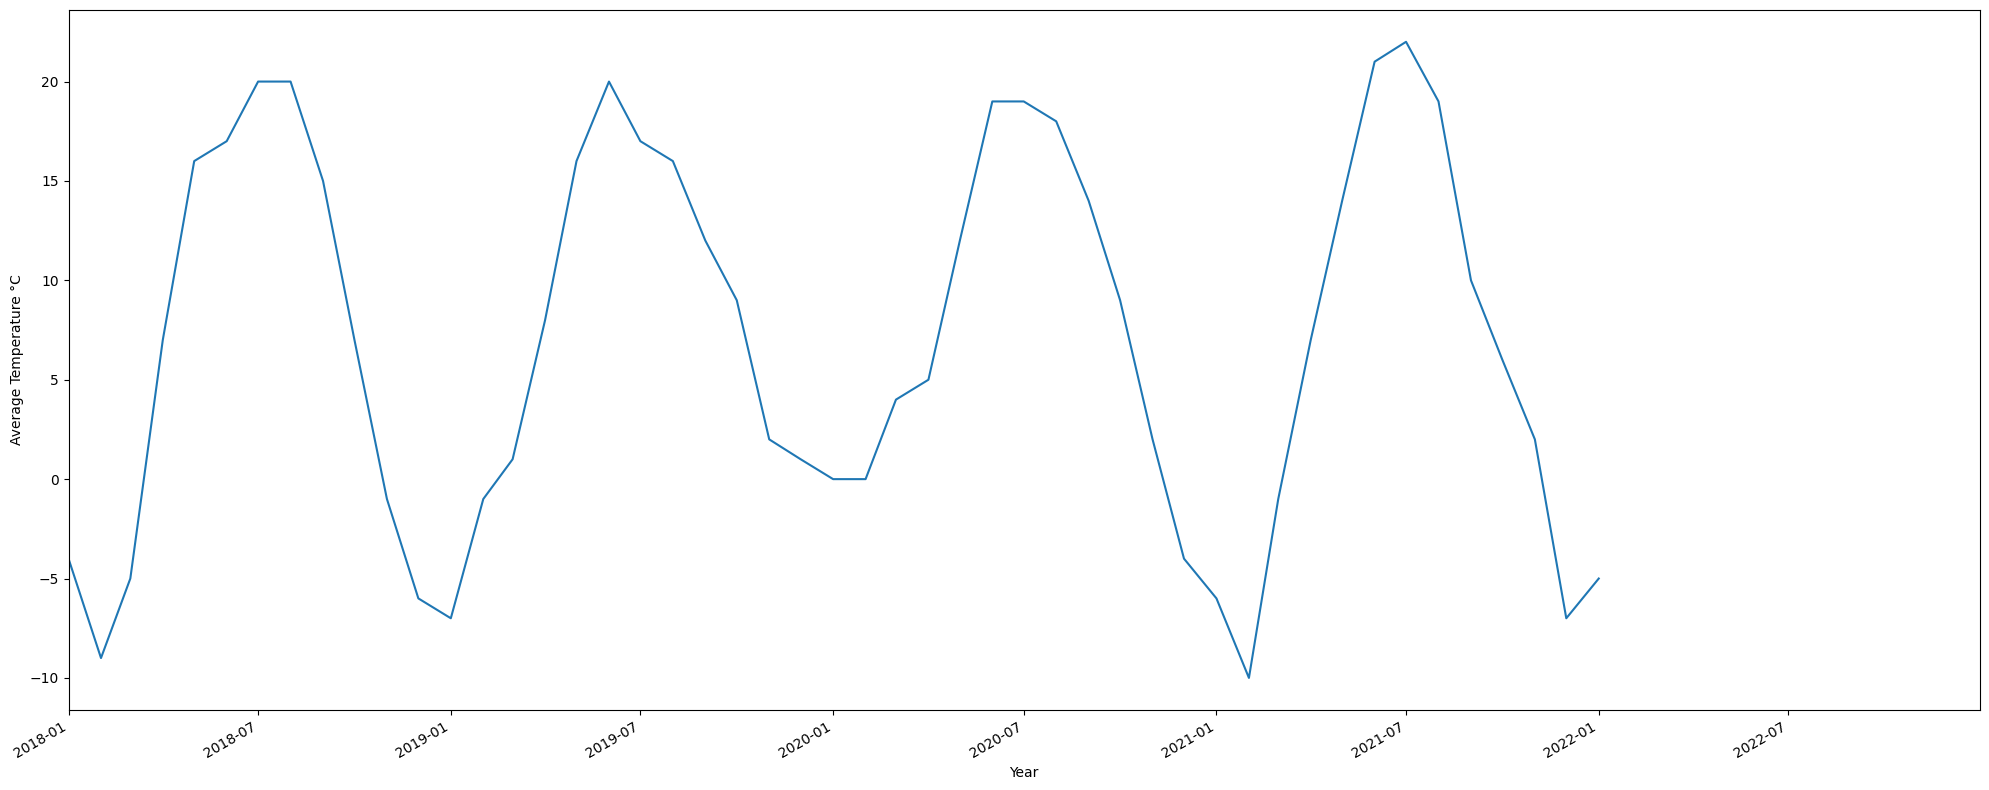

In [ ]:
fig, ax = plt.subplots(figsize=(20,8))

ax.plot(df['Month'],df['Temperature']) 

for i in np.arange(0, 49, 12):
    ax.axvline(x=i, linestyle='--', color='black', linewidth=1)
ax.set_xlabel('Year')
ax.set_ylabel('Average Temperature °C')

ax.set_xlim(pd.Timestamp('2018-01-01'), pd.Timestamp('2022-12-31'))
fig.autofmt_xdate()
plt.tight_layout()

In [ ]:
advanced_decomposition = STL(df.Temperature, period=4).fit()

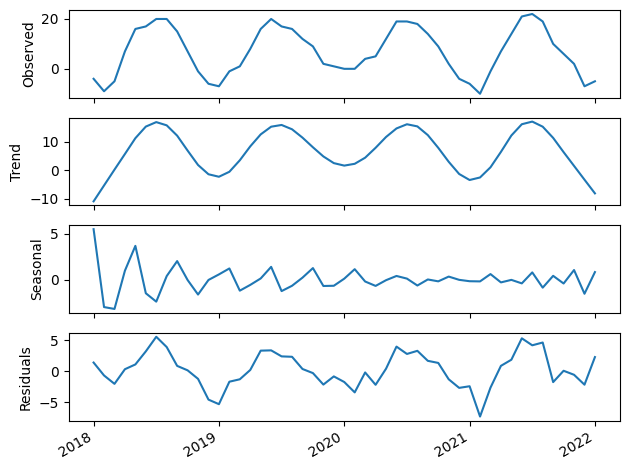

In [ ]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, ncols=1, sharex=True)

ax1.plot(advanced_decomposition.observed)
ax1.set_ylabel('Observed')

ax2.plot(advanced_decomposition.trend)
ax2.set_ylabel('Trend')

ax3.plot(advanced_decomposition.seasonal)
ax3.set_ylabel('Seasonal')

ax4.plot(advanced_decomposition.resid)
ax4.set_ylabel('Residuals')

plt.xticks(np.arange(0,49,12), [2018,2019,2020,2021,2022])

fig.autofmt_xdate()
plt.tight_layout()



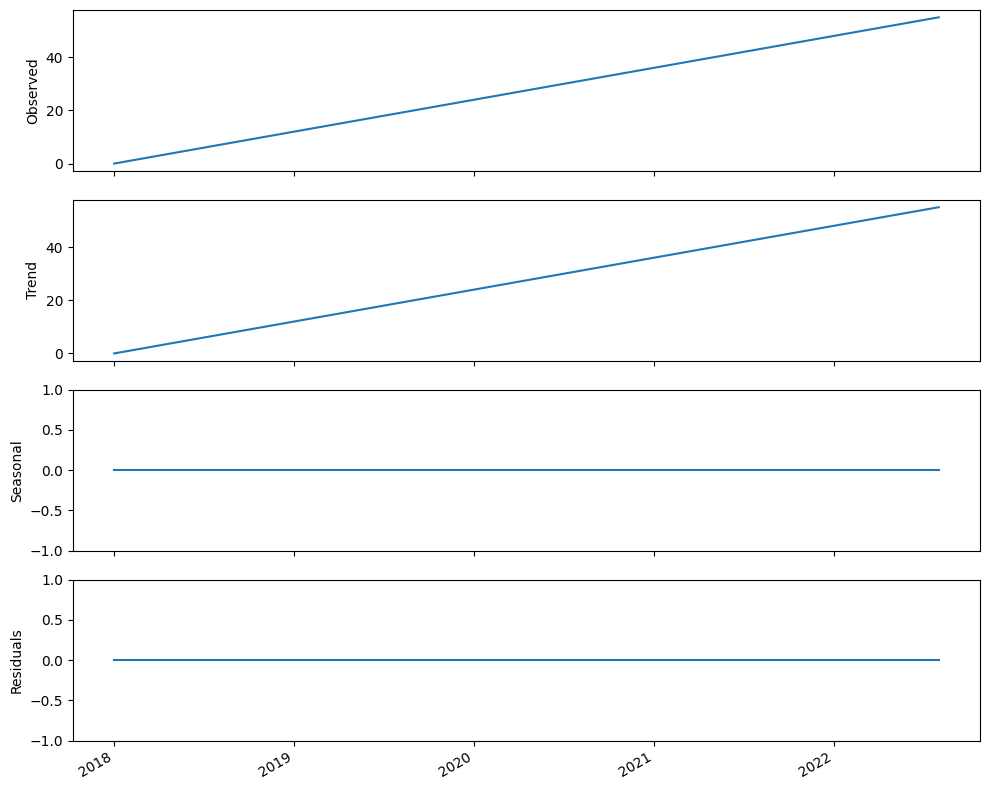

In [ ]:
linear_ts = np.arange(0, 56, 1)

decomposition = STL(linear_ts, period=12).fit()

fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, ncols=1, sharex=True, figsize=(10,8))

ax1.plot(decomposition.observed)
ax1.set_ylabel('Observed')

ax2.plot(decomposition.trend)
ax2.set_ylabel('Trend')

ax3.plot(decomposition.seasonal)
ax3.set_ylabel('Seasonal')
ax3.set_ylim(-1, 1)

ax4.plot(decomposition.resid)
ax4.set_ylabel('Residuals')
ax4.set_ylim(-1, 1)

plt.xticks(np.arange(0,49,12), [2018,2019,2020,2021,2022])

fig.autofmt_xdate()
plt.tight_layout()

In [ ]:
df_diff = np.diff(df['Temperature'], n=1)

ad_fuller_result = adfuller(df_diff)

print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')

ADF Statistic: -5.156005075088917
p-value: 1.0804766646237403e-05


In [ ]:
df_diff = np.diff(df['Temperature'], n=1)

ad_fuller_result = adfuller(df_diff)

print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')

ADF Statistic: -5.156005075088917
p-value: 1.0804766646237403e-05


In [ ]:
df_diff = np.diff(df['Temperature'], n=1)

ad_fuller_result = adfuller(df_diff)

print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')

ADF Statistic: -5.156005075088917
p-value: 1.0804766646237403e-05


In [ ]:
df_diff_seasonal_diff = np.diff(df_diff, n=12)

ad_fuller_result = adfuller(df_diff_seasonal_diff)

print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')

ADF Statistic: -5.573302318953498
p-value: 1.4509548948626059e-06


In [ ]:
df_diff2 = np.diff(df_diff, n=1)

ad_fuller_result = adfuller(df_diff2)

print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')

ADF Statistic: -4.107965906746119
p-value: 0.000939573529388492


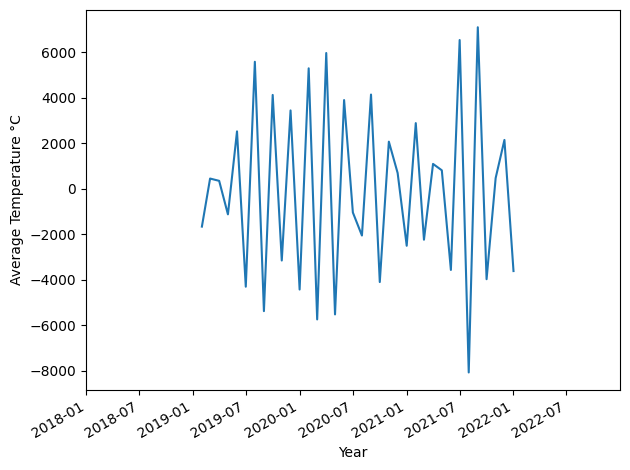

In [ ]:
fig, ax = plt.subplots()

ax.plot(df['Month'][13:],df_diff_seasonal_diff)
ax.set_xlabel('Year')

ax.set_ylabel('Average Temperature °C')


ax.set_xlim(pd.Timestamp('2018-01-01'), pd.Timestamp('2022-12-31'))
fig.autofmt_xdate()
plt.tight_layout()


The p-value of seasonal difference after first difference is 1.0804766646237403e-05, which is small and lower then 0.05 .So the series after seasonal difference is stationary

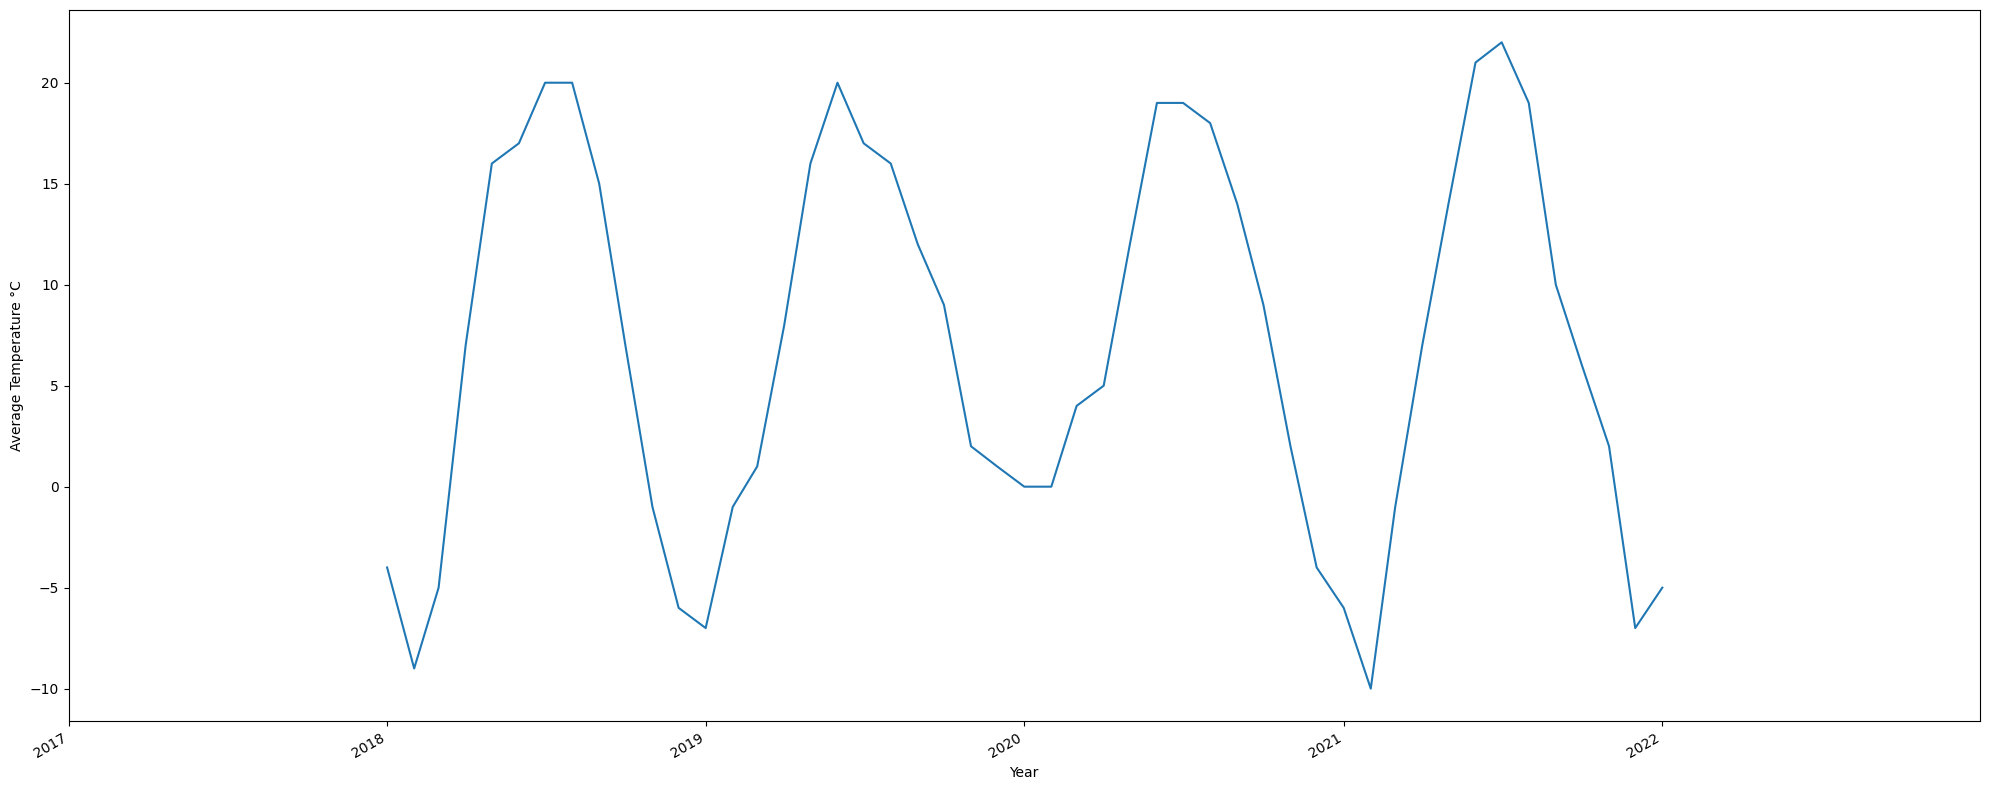

In [ ]:
fig, ax = plt.subplots(figsize=(20, 8))

ax.plot(df['Month'],df['Temperature'])


ax.set_xlabel('Year')

ax.set_ylabel('Average Temperature °C')

ax.axvspan(48, 59, color='#808080', alpha=0.2)

ax.axvspan(0, 48, color='#e9a296', alpha=0.1)

ax.set_xlim(pd.Timestamp('2017-01-01'), pd.Timestamp('2022-12-31'))

fig.autofmt_xdate()

plt.tight_layout()


In [ ]:
def optimize_SARIMA(train, order_list, d, D, s) -> pd.DataFrame:
    
    results = []
    
    for order in tqdm_notebook(order_list):
        try: 
            model = SARIMAX(
                train, 
                order=(order[0], d, order[1]),
                seasonal_order=(order[2], D, order[3], s),
                simple_differencing=False).fit(disp=False)
        except:
            continue
            
        aic = model.aic
        results.append([order, aic])
        
    result_df = pd.DataFrame(results)
    result_df.columns = ['(p,q,P,Q)', 'AIC']

    result_df = result_df.sort_values(by='AIC', ascending=True).reset_index(drop=True)
    
    return result_df

In [ ]:
ps = range(0, 4, 1)
qs = range(0, 4, 1)
Ps = range(0, 4, 1)
Qs = range(0, 4, 1)

SARIMA_order_list = list(product(ps, qs, Ps, Qs))

train = df['Temperature'][:-12]

d = 1
D = 1
s = 12

SARIMA_result_df = optimize_SARIMA(train, SARIMA_order_list, d, D, s)
SARIMA_result_df

  0%|          | 0/256 [00:00<?, ?it/s]

,"(p,q,P,Q)",AIC
0,"(0, 2, 1, 0)",131.963834
1,"(0, 2, 0, 1)",132.595143
2,"(2, 3, 0, 0)",132.870391
3,"(0, 2, 2, 0)",133.469160
4,"(2, 1, 1, 0)",133.598475
...,...,...
251,"(3, 3, 3, 3)",145.938428
252,"(3, 2, 3, 3)",146.340213
253,"(0, 1, 3, 3)",146.596200
254,"(1, 0, 3, 3)",146.933172


In [ ]:
SARIMA_model = SARIMAX(train, order=(0, 1, 1), seasonal_order=(1,1,0,12), simple_differencing=False)
SARIMA_model_fit = SARIMA_model.fit(disp=False)

print(SARIMA_model_fit.summary())

                                      SARIMAX Results                                      
Dep. Variable:                         Temperature   No. Observations:                   37
Model:             SARIMAX(0, 1, 1)x(1, 1, [], 12)   Log Likelihood                 -65.443
Date:                             Mon, 08 May 2023   AIC                            136.886
Time:                                     22:13:46   BIC                            140.420
Sample:                                          0   HQIC                           137.823
                                              - 37                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.1652      0.373     -0.444      0.657      -0.895       0.565
ar.S.L12      -0.4300      

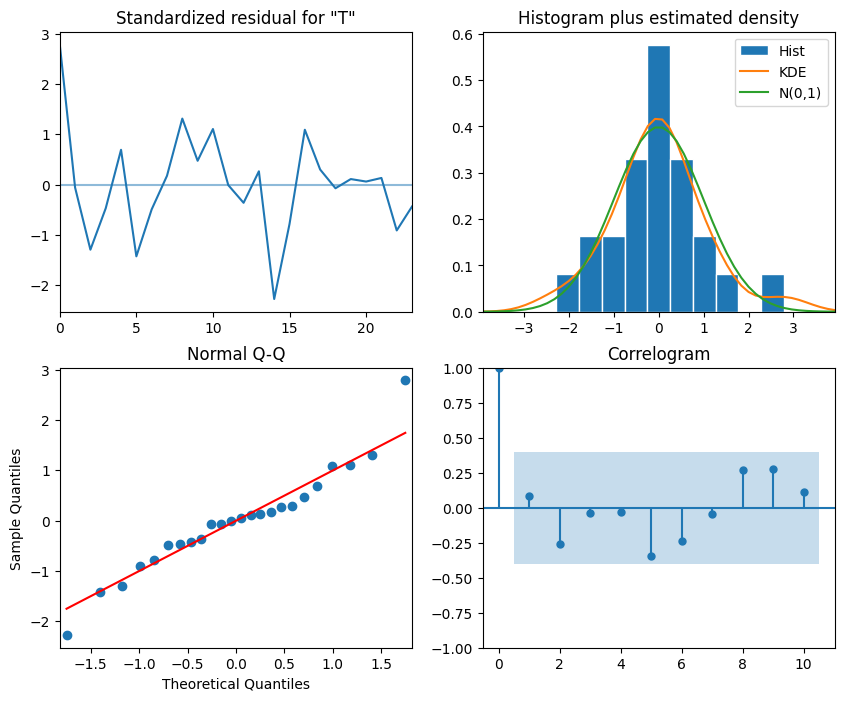

In [ ]:
SARIMA_model_fit.plot_diagnostics(figsize=(10,8));



In [ ]:
from statsmodels.stats.diagnostic import acorr_ljungbox


residuals = SARIMA_model_fit.resid


acorr_ljungbox(residuals, np.arange(1, 11, 1))

,lb_stat,lb_pvalue
1,7.260571,0.007048
2,7.715506,0.021115
3,9.604611,0.022244
4,11.757353,0.019250
5,17.828274,0.003170
6,22.156249,0.001134
7,22.705418,0.001918
8,23.720313,0.002553
9,30.066195,0.000427
10,34.570147,0.000148


In [ ]:
residuals = SARIMA_model_fit.resid

lbvalue, pvalue = acorr_ljungbox(residuals, np.arange(1, 11, 1))

print(pvalue)

lb_pvalue


In [ ]:
test = df.iloc[-4:]

test['naive_seasonal'] = df['Temperature'].iloc[35:39].values
test

,Month,Temperature,naive_seasonal
45,2021-10-01,6,-4
46,2021-11-01,2,-6
47,2021-12-01,-7,-10
48,2022-01-01,-5,-1


In [ ]:
SARIMA_pred = SARIMA_model_fit.get_prediction(45, 48).predicted_mean

test['SARIMA_pred'] = SARIMA_pred
test

,Month,Temperature,naive_seasonal,SARIMA_pred
45,2021-10-01,6,-4,6.262603
46,2021-11-01,2,-6,-0.737397
47,2021-12-01,-7,-10,-4.587469
48,2022-01-01,-5,-1,-6.157484


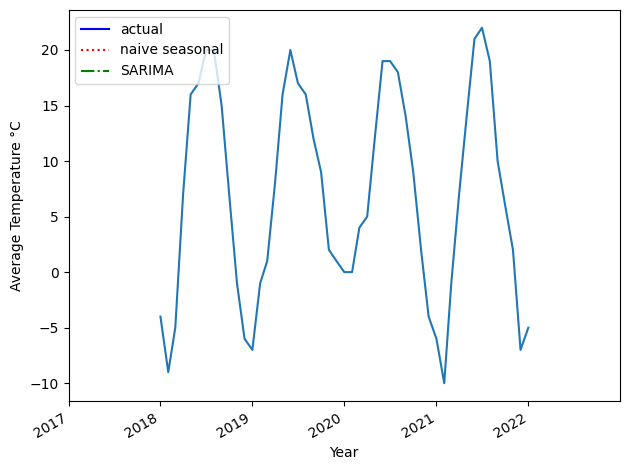

In [ ]:
fig, ax = plt.subplots()

ax.plot(df['Month'],df['Temperature'])
ax.plot(test['Temperature'], 'b-', label='actual')
ax.plot(test['naive_seasonal'], 'r:', label='naive seasonal')
ax.plot(test['SARIMA_pred'], 'g-.', label='SARIMA')

ax.set_xlabel('Year')

# Setting y-axis label
ax.set_ylabel('Average Temperature °C')

ax.axvspan(48, 59, color='#808080', alpha=0.2)

ax.legend(loc=2)


ax.set_xlim(pd.Timestamp('2017-01-01'), pd.Timestamp('2022-12-31'))

fig.autofmt_xdate()
plt.tight_layout()


In [ ]:
def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [ ]:
mape_naive_seasonal = mape(test['Temperature'], test['naive_seasonal'])
mape_SARIMA = mape(test['Temperature'], test['SARIMA_pred'])

print(mape_naive_seasonal, mape_SARIMA)

172.38095238095238 49.71524388477313


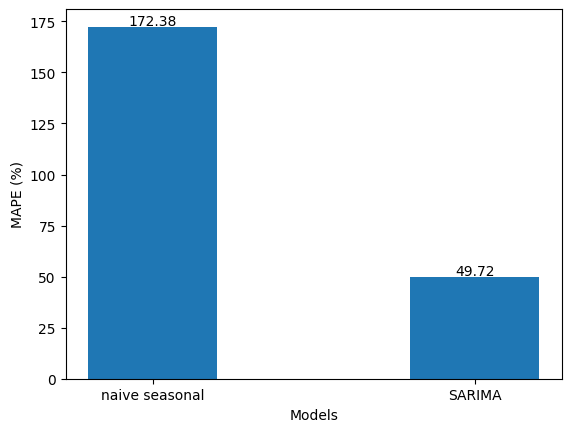

In [ ]:
fig, ax = plt.subplots()

x = ['naive seasonal', 'SARIMA']
y = [mape_naive_seasonal, mape_SARIMA]

ax.bar(x, y, width=0.4)
ax.set_xlabel('Models')
ax.set_ylabel('MAPE (%)')


for index, value in enumerate(y):
    plt.text(x=index, y=value + 1, s=str(round(value,2)), ha='center')


Using the mape(%) this gives a good overall indication of the accuracy of the results with different models. The display of the naive seasonal forecasting method being a lot higher than the sarima is a good indication that sarima is closest to the dataset.